In [38]:
import unicodecsv
import pandas as pd
#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [39]:
data = read_csv('../model/ex1data1.txt')
data[:5]

[OrderedDict([('6.1101', '5.5277'), ('17.592', '9.1302')]),
 OrderedDict([('6.1101', '8.5186'), ('17.592', '13.662')]),
 OrderedDict([('6.1101', '7.0032'), ('17.592', '11.854')]),
 OrderedDict([('6.1101', '5.8598'), ('17.592', '6.8233')]),
 OrderedDict([('6.1101', '8.3829'), ('17.592', '11.886')])]

In [40]:
df_data = pd.read_csv('ex1data1.txt',header = None, names=['x','y'])
df_data[:5]

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# นำ  x มารวมกับ 1 

In [41]:
import pandas as pd
import numpy as np

x =df_data['x']
y = df_data['y']
T = np.ones((len(x), 1))
mat_one = np.c_[T, x]
mat_one[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [42]:
y_ar = np.array(y)
y_ar


array([ 17.592  ,   9.1302 ,  13.662  ,  11.854  ,   6.8233 ,  11.886  ,
         4.3483 ,  12.     ,   6.5987 ,   3.8166 ,   3.2522 ,  15.505  ,
         3.1551 ,   7.2258 ,   0.71618,   3.5129 ,   5.3048 ,   0.56077,
         3.6518 ,   5.3893 ,   3.1386 ,  21.767  ,   4.263  ,   5.1875 ,
         3.0825 ,  22.638  ,  13.501  ,   7.0467 ,  14.692  ,  24.147  ,
        -1.22   ,   5.9966 ,  12.134  ,   1.8495 ,   6.5426 ,   4.5623 ,
         4.1164 ,   3.3928 ,  10.117  ,   5.4974 ,   0.55657,   3.9115 ,
         5.3854 ,   2.4406 ,   6.7318 ,   1.0463 ,   5.1337 ,   1.844  ,
         8.0043 ,   1.0179 ,   6.7504 ,   1.8396 ,   4.2885 ,   4.9981 ,
         1.4233 ,  -1.4211 ,   2.4756 ,   4.6042 ,   3.9624 ,   5.4141 ,
         5.1694 ,  -0.74279,  17.929  ,  12.054  ,  17.054  ,   4.8852 ,
         5.7442 ,   7.7754 ,   1.0173 ,  20.992  ,   6.6799 ,   4.0259 ,
         1.2784 ,   3.3411 ,  -2.6807 ,   0.29678,   3.8845 ,   5.7014 ,
         6.7526 ,   2.0576 ,   0.47953,   0.20421, 

In [43]:
theta= np.array([1, 1])

# นำ ทั้ง 2  array มาคูณกัน

In [44]:
 h = np.dot(mat_one, theta)
h.shape

(97,)

In [45]:
mat_one.shape

(97, 2)

In [46]:
theta.shape

(2,)

In [47]:
loss = h - y
loss[:5]

0   -10.4819
1    -2.6025
2    -4.1434
3    -3.8508
4     0.0365
Name: y, dtype: float64

In [48]:
len(loss)

97

# cost

In [49]:
m = len(x)
cost = np.sum(loss ** 2) / (2 * m)
cost

10.266520491383504

In [50]:
X = np.c_[T, x]

In [51]:
X.shape

(97, 2)

# ทำเป็น cost function

In [52]:
init_theta = np.array([1,1])

In [53]:
def compute_cost(x, y, init_theta):
    x =df_data['x']
    y = df_data['y']
    m = len(x)
    X = np.c_[T, x]
    y_ar = np.array(y)
    h = X.dot(theta)
    J = np.sum((h-y_ar)**2)
    Jx = (J/(2*m))
    return Jx
 
 

In [54]:
compute_cost(x, y, init_theta)

10.266520491383504

In [55]:
y_ar.shape

(97,)

# gradient descent

In [56]:
iterations = 2000
alpha = 0.001


In [57]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = compute_cost(x, y, theta)
        cost_history[iteration] = cost
        

    return theta, cost_history


In [58]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)

In [59]:
print (t)

[-0.50271624  0.8521635 ]


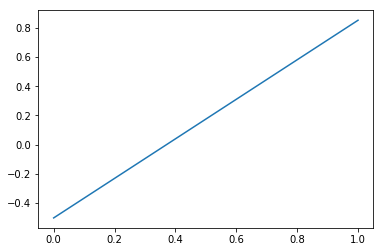

final x = [-0.50271624  0.8521635 ]
final cost = 10.2665204914


In [60]:
import matplotlib.pyplot as plt 
plt.plot(t) 
plt.show()  
print ('final x = %s' % t)
print ('final cost = %s' % c[0])

# grade ไม่ใช้ for

In [24]:
import numpy as np
def compute_grad(x, y, theta):

    x =df_data['x']
    y = df_data['y']
    m = len(x)
    y_ar = np.array(y)
    theta_grad = np.array([0, 0])
    X = np.c_[T, x]
    h= X.dot(theta)
    theta_grad[0] = (1./(m))*(np.sum(h-y_ar))
    theta_grad[1] = (1./(m))*(np.sum((h-y_ar)*x))
    return theta_grad

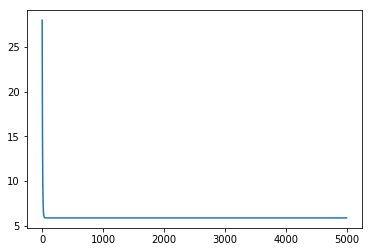

final x = [ 0.04   0.787]
final cost = 5.89257356052


In [25]:
import matplotlib.pyplot as plt 
x =df_data['x']
y = df_data['y']
J = [] 
theta = np.array([0, 0])
n_iter = 5000

for i in range(n_iter):
    theta_grad = compute_grad(x, y, theta)
    theta = theta - 0.001*theta_grad
    J.append(compute_cost(x, y, theta))

plt.plot(J) 
plt.show()  
print ('final x = %s' % theta)
print ('final cost = %s' % J[-1])


# plot linear

In [26]:
import numpy as np

x =df_data['x']
y = df_data['y']

A = np.vstack([x, np.ones(len(x))]).T  
b1, b2 = np.linalg.lstsq(A, y)[0]  
print(b1,b2)  

1.19303364419 -3.89578087831


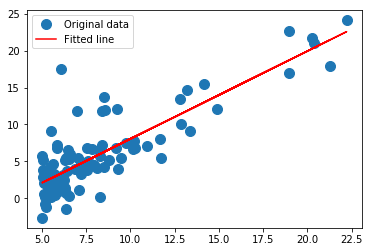

In [62]:
import matplotlib.pyplot as plt  
plt.plot(x, y, 'o', label='Original data', markersize=10)  
plt.plot(x, b1*x + b2, 'r', label='Fitted line')  
plt.legend()  
plt.show()  


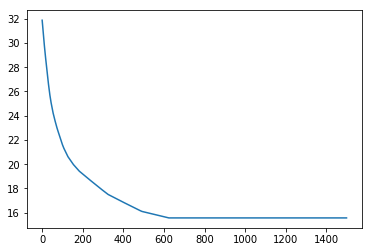

final x = [ 0.     0.314]
final cost = 15.5725266306


In [28]:
import numpy as np
import matplotlib.pyplot as plt  

def compute_grad(X, y, theta):
    m = len(X)
    theta_grad = np.array([0, 0])
    for i in range(m):
        theta_grad[0] += (1./(m))*((theta[0] + theta[1]*X[i]) - y[i])
        theta_grad[1] += (1./(m))*((theta[0] + theta[1]*X[i]) - y[i])*X[i]
    return theta_grad
def compute_cost(X, y, theta):
    m = len(X)
    J = 0
    for i in range(m):
        J += (1./(2*m))*((theta[0] + theta[1]*X[i]) - y[i])**2
    return J


X =df_data['x']
y = df_data['y']
plot=[] 
theta = np.array([0,0])
n_iter = 1500
for i in range(n_iter):
    theta_grad = compute_grad(X, y, theta)
    theta = theta - 0.0001*theta_grad
    plot.append(compute_cost(x, y, theta))

plt.plot(plot)
plt.show()  
print ('final x = %s' % theta)
print ('final cost = %s' % plot[-1])




# distance

In [82]:
data_address = read_csv('../data_20180120/customer.csv')
id_address =read_csv('../data_clean/customer_address.csv')

In [83]:
df_province = pd.DataFrame(data_address)

df_id_add = pd.DataFrame(id_address)
df_province['ADDRESS_PROVINCE'][:5]


0    จ.ชลบุรี
1            
2            
3            
4            
Name: ADDRESS_PROVINCE, dtype: object

In [89]:
 all_data = pd.concat([df_id_add,df_province['ADDRESS_PROVINCE']], axis=1)
new = all_data[all_data['CUSTOMER_ID'].notnull()&(all_data['ADDRESS_POSTAL_CODE'].notnull())]
new[:5]

,CUSTOMER_ID,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE
0,2083,20170,จ.ชลบุรี
1,2390,10250,
2,2406,10150,
3,2412,11110,
4,2413,11000,


In [90]:
new.dtypes

CUSTOMER_ID            object
ADDRESS_POSTAL_CODE    object
ADDRESS_PROVINCE       object
dtype: object

# min distance from 12 branch

In [98]:
import urllib.request
import json


res = urllib.request.urlopen("https://maps.googleapis.com/maps/api/distancematrix/json?origins=Nakhonratchasima+30000%7CPhuket+83000%7CNonthaburi+11140%7CBangkok+11130%7CBangkok+10260%7CBangkok+10240%7CPathum+12130%7CBangkok+10400%7CBangkok+10330%7CBangkok+10700%7CBangkok+74000%7CBangkok+10230&destinations=Chonburi+2170").read()
data = json.loads(res.decode())
branch = data['rows']
branch_distance = []
for i in range(len(branch)):
    branch_distance.append(branch[i]['elements'][0]['distance']['value'])
print (min(branch_distance))

ValueError: min() arg is an empty sequence

In [26]:
destination = df_address['ADDRESS_POSTAL_CODE']
for d in range(len(destination)):
    
    